# State of Data Brazil 2022 | Kaggle

## Objetivo

Quais fatores tornam um profissional da área de dados satisfeito

## Metodologia

Usarei a base de dados disponibilizada no desafio State of Data 2022

### Configuração inicial

In [4]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [6]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [7]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Testando o novo modo de leitura das colunas
data.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d

In [8]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 8 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

### Trabalhando os dados de carreira

In [9]:
#Separando todas as perguntas da parte 2 em um novo dataset para análise de carreira

colunas_p2 = [coluna for coluna in data.columns if coluna.startswith('P2')]

data_parte2 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p2], axis=1)

In [16]:
# Cabeçalho para consulta

data_parte2.head(5)

,P0_id,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,Servidor Público,Setor Público,Acima de 3.000,False,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
1,zzls2oftfn9law393oezzls2ofhvfpzd,Empregado (CLT),Outra Opção,Acima de 3.000,True,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,Empregado (CLT),Setor Automotivo,Acima de 3.000,False,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração

In [30]:
print(data_parte2.columns)

Index(['P0_id', 'P2_a _Qual sua situação atual de trabalho?', 'P2_b _Setor',
       'P2_c _Numero de Funcionarios', 'P2_d _Gestor?',
       'P2_e _Cargo como Gestor', 'P2_f _Cargo Atual', 'P2_g _Nivel',
       'P2_h _Faixa salarial',
       'P2_i _Quanto tempo de experiência na área de dados você tem?',
       'P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'P2_k _Você está satisfeito na sua empresa atual?',
       'P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?',
       'P2_l_1 _Falta de oportunidade de crescimento no emprego atual',
       'P2_l_2 _Salário atual não corresponde ao mercado',
       'P2_l_3 _Não tenho uma boa relação com meu líder/gestor',
       'P2_l_4 _Gostaria de trabalhar em em outra área de atuação',
       'P2_l_5 _Gostaria de receber mais benefícios',
       'P2_l_6 _O clima de trabalho/ambiente não é bom',
       'P2_l_7 _Falta de maturidade analít

In [26]:
#Definindo a média salarial por situação atual de trabalho

valores_unicos = data_parte2['P2_h _Faixa salarial'].unique()

for valor in valores_unicos:
    print(valor)

de R$ 8.001/mês a R$ 12.000/mês
de R$ 4.001/mês a R$ 6.000/mês
de R$ 12.001/mês a R$ 16.000/mês
de R$ 6.001/mês a R$ 8.000/mês
de R$ 2.001/mês a R$ 3.000/mês
de R$ 3.001/mês a R$ 4.000/mês
nan
de R$ 20.001/mês a R$ 25.000/mês
de R$ 16.001/mês a R$ 20.000/mês
de R$ 1.001/mês a R$ 2.000/mês
Menos de R$ 1.000/mês
de R$ 25.001/mês a R$ 30.000/mês
Acima de R$ 40.001/mês
de R$ 30.001/mês a R$ 40.000/mês


In [31]:
def mapear_faixa_salarial(faixa_salarial):
    if pd.isna(faixa_salarial):  # Trate valores nulos, se houver
        return None
    # Defina um dicionário que mapeia faixas salariais para valores numéricos
    mapeamento = {
        'Menos de R$ 1.000/mês': 500,
        'de R$ 1.001/mês a R$ 2.000/mês': 1500,
        'de R$ 2.001/mês a R$ 3.000/mês': 2500,
        'de R$ 3.001/mês a R$ 4.000/mês': 3500,
        'de R$ 4.001/mês a R$ 6.000/mês': 5000,
        'de R$ 6.001/mês a R$ 8.000/mês': 7000,
        'de R$ 8.001/mês a R$ 12.000/mês': 10000,
        'de R$ 12.001/mês a R$ 16.000/mês': 14000,
        'de R$ 16.001/mês a R$ 20.000/mês': 18000,
        'de R$ 20.001/mês a R$ 25.000/mês': 22500,
        'de R$ 25.001/mês a R$ 30.000/mês': 27500,
        'Acima de R$ 40.001/mês': 40000
    }
    # Mapeie a faixa salarial para o valor numérico correspondente
    return mapeamento.get(faixa_salarial, None)

# Crie uma nova coluna com valores numéricos representativos das faixas salariais
data_parte2['Valor_Salarial'] = data_parte2['P2_h _Faixa salarial'].apply(mapear_faixa_salarial)

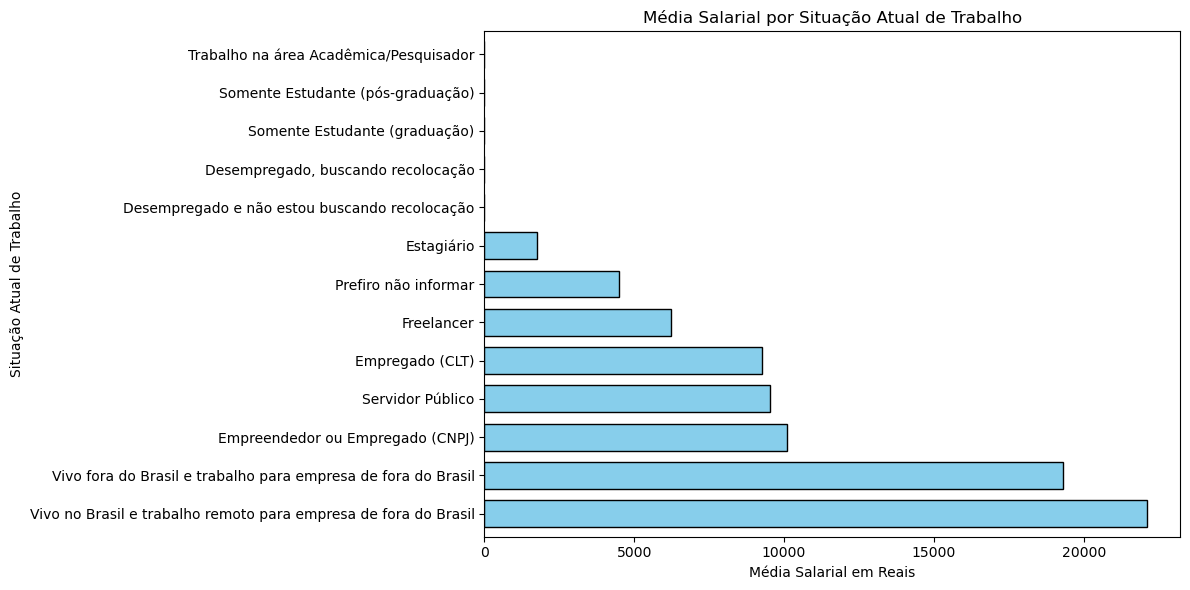

In [41]:
plt.figure(figsize=(12, 6))
ax = data_parte2.groupby('P2_a _Qual sua situação atual de trabalho?')['Valor_Salarial'].mean().sort_values(ascending=False).plot(kind='barh', color='skyblue', edgecolor='black', width=0.7)
plt.title('Média Salarial por Situação Atual de Trabalho')
plt.xlabel('Média Salarial em Reais')
plt.ylabel('Situação Atual de Trabalho')
plt.xticks(rotation=0)  # Rotação dos rótulos no eixo x para melhor legibilidade
plt.tight_layout()


# Mostre o gráfico
plt.show()

Insight: Remuneração para profissionais trabalhando fora ou para empresas fora do país é mais que o dobro em comparação a funcionários CLT, PJ ou Servidores Públicos

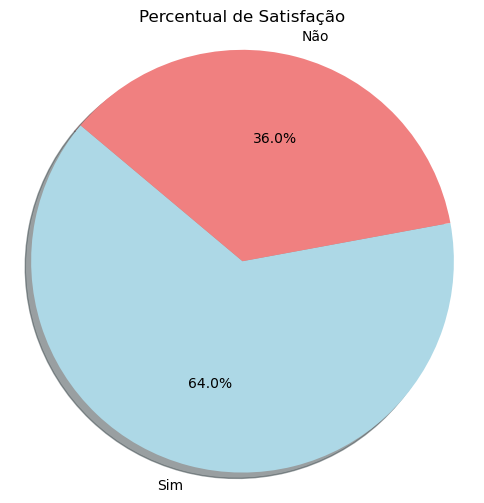

In [47]:
#Denifindo Quantidade de profissionais Satisfeitos com o que fazem

contagem_sim = data_parte2['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_nao = len(data_parte2) - contagem_sim

labels = ['Sim', 'Não']
sizes = [contagem_sim, contagem_nao]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentual de Satisfação')

plt.show()

Insight: Toda a pesquisa vai girar em torno deste gráfico para entender o porquê de 36% da amostra estar insatisfeito com a área de dados.

In [15]:
valores_unicos = data['P2_l_2 _Salário atual não corresponde ao mercado'].unique()
print(valores_unicos)

[nan  0.  1.]


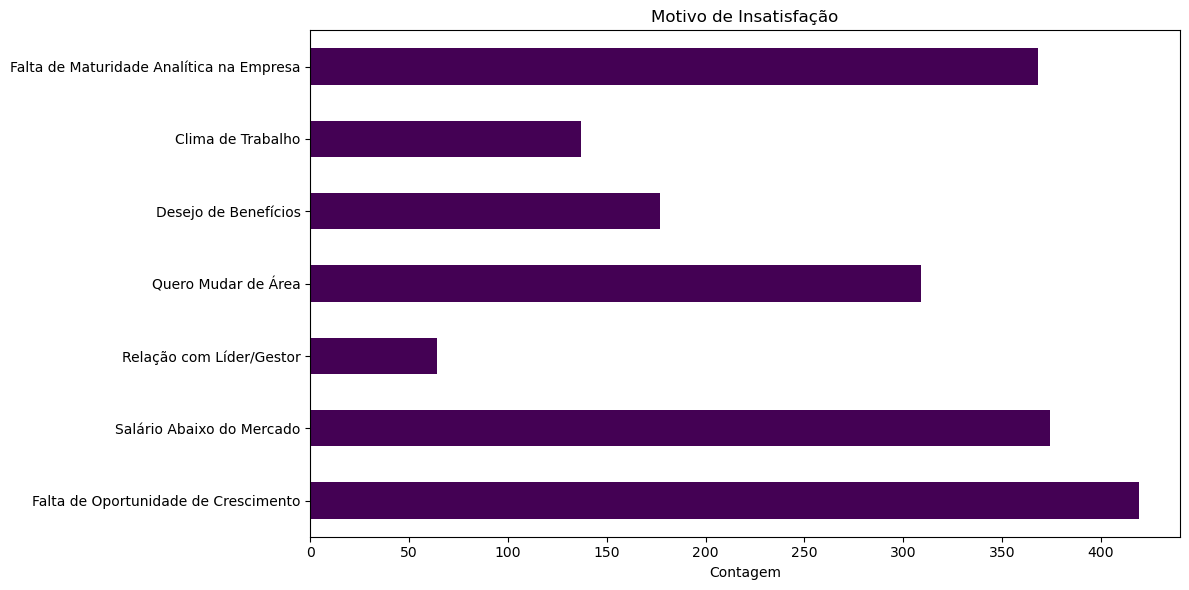

In [28]:
# Selecione as colunas que você deseja contar e renomear
colunas_contagem = {
    'P2_l_1 _Falta de oportunidade de crescimento no emprego atual': 'Falta de Oportunidade de Crescimento',
    'P2_l_2 _Salário atual não corresponde ao mercado': 'Salário Abaixo do Mercado',
    'P2_l_3 _Não tenho uma boa relação com meu líder/gestor': 'Relação com Líder/Gestor',
    'P2_l_4 _Gostaria de trabalhar em em outra área de atuação': 'Quero Mudar de Área',
    'P2_l_5 _Gostaria de receber mais benefícios': 'Desejo de Benefícios',
    'P2_l_6 _O clima de trabalho/ambiente não é bom': 'Clima de Trabalho',
    'P2_l_7 _Falta de maturidade analítica na empresa': 'Falta de Maturidade Analítica na Empresa'
}

# Crie um novo DataFrame com as contagens
contagem_df = pd.DataFrame()
for coluna, novo_nome in colunas_contagem.items():
    contagem_df[novo_nome] = data_parte2[coluna].value_counts()

# Transponha o DataFrame para que as colunas se tornem índices
contagem_df = contagem_df.T

# Crie um gráfico de barras horizontais empilhadas, excluindo o valor 0.0
ax = contagem_df[contagem_df.columns[contagem_df.columns != 0.0]].plot(
    kind='barh', stacked=False, figsize=(12, 6), colormap='viridis', legend=False
)

plt.title('Motivo de Insatisfação')
plt.xlabel('Contagem')

# Mostre o gráfico
plt.tight_layout()
plt.show()

Insight: O maior motivo de insatisfação dos trabalhos está relacionado a Oportunidade de Crescimento, Baixo salário e Falta de maturidade analítica na empresa. 

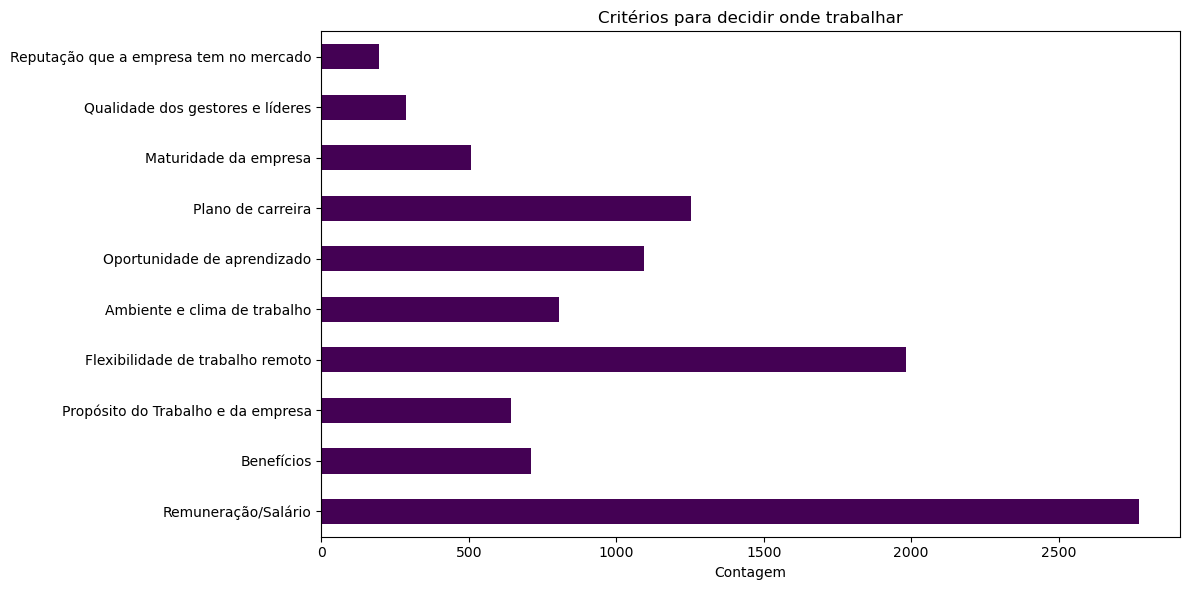

In [29]:
# Selecione as colunas que você deseja contar e renomear
colunas_contagem = {
    'P2_o_1 _Remuneração/Salário' : 'Remuneração/Salário', 
    'P2_o_2 _Benefícios' : 'Benefícios',
    'P2_o_3 _Propósito do trabalho e da empresa' : 'Propósito do Trabalho e da empresa',
    'P2_o_4 _Flexibilidade de trabalho remoto' : 'Flexibilidade de trabalho remoto',
    'P2_o_5 _Ambiente e clima de trabalho' : 'Ambiente e clima de trabalho',
    'P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área' : 'Oportunidade de aprendizado',
    'P2_o_7 _Plano de carreira e oportunidades de crescimento profissional' : 'Plano de carreira',
    'P2_o_8 _Maturidade da empresa em termos de tecnologia e dados' : 'Maturidade da empresa',
    'P2_o_9 _Qualidade dos gestores e líderes' : 'Qualidade dos gestores e líderes',
    'P2_o_10 _Reputação que a empresa tem no mercado' : 'Reputação que a empresa tem no mercado',
}

# Crie um novo DataFrame com as contagens
contagem_df = pd.DataFrame()
for coluna, novo_nome in colunas_contagem.items():
    contagem_df[novo_nome] = data_parte2[coluna].value_counts()

# Transponha o DataFrame para que as colunas se tornem índices
contagem_df = contagem_df.T

# Crie um gráfico de barras horizontais empilhadas, excluindo o valor 0.0
ax = contagem_df[contagem_df.columns[contagem_df.columns != 0.0]].plot(
    kind='barh', stacked=False, figsize=(12, 6), colormap='viridis', legend=False
)

plt.title('Critérios para decidir onde trabalhar')
plt.xlabel('Contagem')

# Mostre o gráfico
plt.tight_layout()
plt.show()

Insight: O profissional da área de dados busca boa remuneração, flexibilidade e plano de carreira.

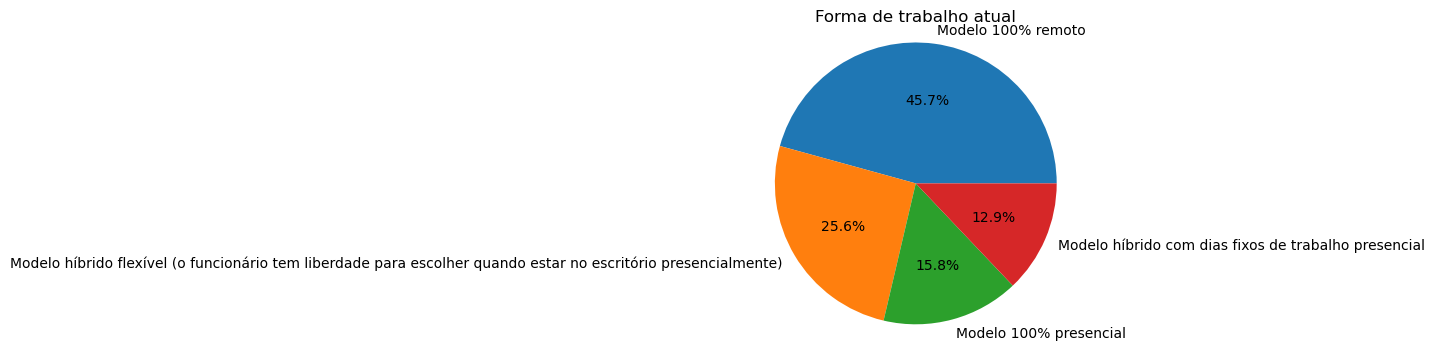

In [36]:
forma_trabalho = data_parte2['P2_p _Atualmente qual a sua forma de trabalho?']

ctg_forma_trabalho = forma_trabalho.value_counts()

plt.figure(figsize=(4,4))
plt.pie(ctg_forma_trabalho, labels=ctg_forma_trabalho.index, autopct='%1.1f%%')

plt.title('Forma de trabalho atual')
plt.axis('equal')
plt.show()

Insight: A área de dados tem quase 50% da sua força de trabalho trabalhando de forma remota. Isso também inclui muitos profissionais que estão trabalhando para outros países de forma remota nessa amostra

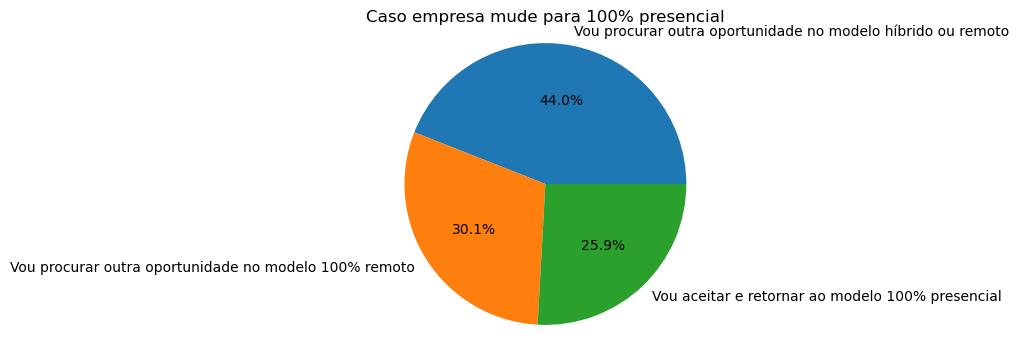

In [38]:
forma_trabalho = data_parte2['P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?']

ctg_forma_trabalho = forma_trabalho.value_counts()

plt.figure(figsize=(4,4))
plt.pie(ctg_forma_trabalho, labels=ctg_forma_trabalho.index, autopct='%1.1f%%')

plt.title('Caso empresa mude para 100% presencial')
plt.axis('equal')
plt.show()

Insight: O modelo remoto é determinante para satisfação de 2/3 dos profissionais da área de dados.

In [18]:
import seaborn as sns

df = data_parte2

correlation_matrix = df.corr()

correlation_matrix_filtrada = correlation_matrix[correlation_matrix > 0.0]

C:\Users\Filiphe\AppData\Local\Temp\ipykernel_11052\786343217.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


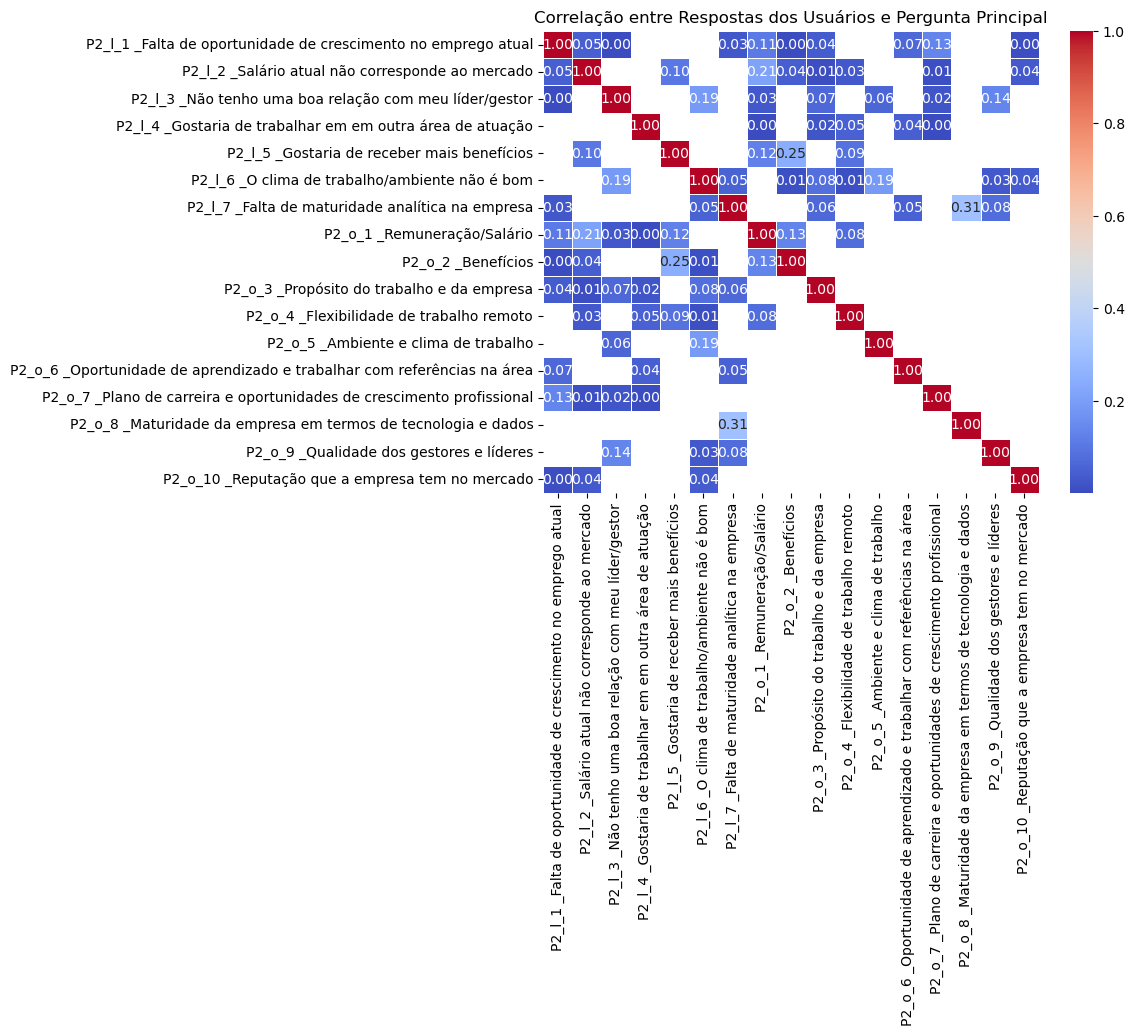

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_filtrada, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Respostas dos Usuários e Pergunta Principal')
plt.show()

In [20]:
correlation_pairs = []

for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:
            correlation_pairs.append((column1, column2, correlation_matrix.loc[column1, column2]))
        
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for pair in correlation_pairs:
    column1, column2, corr_value = pair
    print(f"Colunas: {column1} e {column2}, Correlação: {corr_value}")

Colunas: P2_l_7 _Falta de maturidade analítica na empresa e P2_o_8 _Maturidade da empresa em termos de tecnologia e dados, Correlação: 0.30764362950023183
Colunas: P2_o_8 _Maturidade da empresa em termos de tecnologia e dados e P2_l_7 _Falta de maturidade analítica na empresa, Correlação: 0.30764362950023183
Colunas: P2_l_5 _Gostaria de receber mais benefícios e P2_o_2 _Benefícios, Correlação: 0.24555477694795286
Colunas: P2_o_2 _Benefícios e P2_l_5 _Gostaria de receber mais benefícios, Correlação: 0.24555477694795286
Colunas: P2_o_4 _Flexibilidade de trabalho remoto e P2_o_7 _Plano de carreira e oportunidades de crescimento profissional, Correlação: -0.2344239779013479
Colunas: P2_o_7 _Plano de carreira e oportunidades de crescimento profissional e P2_o_4 _Flexibilidade de trabalho remoto, Correlação: -0.2344239779013479
Colunas: P2_l_4 _Gostaria de trabalhar em em outra área de atuação e P2_l_7 _Falta de maturidade analítica na empresa, Correlação: -0.23135447639073115
Colunas: P2_l_

Insight: As maiores correlações encontradas entre os entrevistados, são referentes a assuntos como maturidade da empresa, benefícios, flexibilidade e carreira.